### EPS Final CA
#### Soroush Mesforush Mashhad
#### Student No:810198472

## Calling needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import math as m
import random
import statsmodels.api as sm

## Q1

It is my belief that we must substitute all the N/A's with the average of the other data that the we have in the said column,by doing this we shall not harm our analysis with fake data.

In [2]:
Fifa_df = pd.read_csv('FIFA2020.csv',encoding = "ISO-8859-1")
Fifa_list=Fifa_df.T.values.tolist()
#First we Shall do the procedure for the Pace.
Pace=Fifa_list[17]
clPace=[i for i in Pace if str(i)!='nan']
clPace=list(map(int, clPace)) 
Mean_Pace=sum(clPace)/len(clPace)
Fifa_df['pace'] = Fifa_df['pace'].fillna(Mean_Pace) 
#Now we do the fucking procedure for dribbling
Dribbling=Fifa_list[20]
clDribbling=[i for i in Dribbling if str(i)!='nan']
clDribbling=list(map(int, clDribbling)) 
Mean_Dribbling=sum(clDribbling)/len(clDribbling)
Fifa_df['dribbling'] = Fifa_df['dribbling'].fillna(Mean_Dribbling) 
Fifa_df.to_csv("FIFA2020.csv", index=False)

## Q2

### Part a

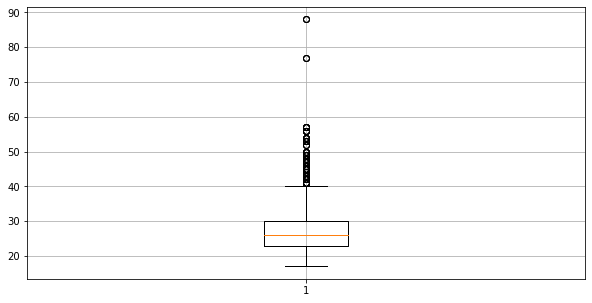

The Maximum and Minimum age are : 88 and 17
The first Quantile is : 23.0
The second Quantile(Median) is : 26.0
The third Quantile is : 30.0


In [3]:
#Here we shall demonstrate the boxplot accordingly
Age=Fifa_list[11]
Age=list(map(int,Age))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.boxplot(Age)
plt.show()
print(f'The Maximum and Minimum age are : {max(Age)} and {min(Age)}')
print(f'The first Quantile is : {np.quantile(Age,.25)}')
print(f'The second Quantile(Median) is : {np.quantile(Age,.50)}')
print(f'The third Quantile is : {np.quantile(Age,.75)}')

In the previous cell the black dots are data that are very far from most of our data(داده پرت),the first quantile shows the age which 25% of the players are younger than that age,the median is the age right in the middle of our dataset and the third quantile is the age which 75% of the players are younger than.

## Part b

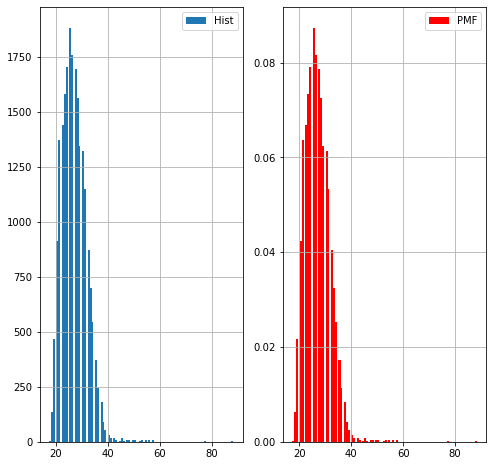

In [4]:
hist,bins=np.histogram(Age,100)
plt.figure(figsize=(8,8))
ax = plt.subplot(121)
CDF_Array=[None]*len(bins)
i=0
#In this while loop we create the cdf by adding the his elements.
while i<len(bins):
    CDF_Array[i]=(sum(hist[0:i]))/sum(hist)
    i=i+1
# Here we plot the PDF,CDF and Histogram accordingly
ax.bar(bins[1:],hist,label='Hist')
ax.grid(True)
ax.legend()
ax = plt.subplot(122)
ax.bar(bins[1:],hist/len(Age),label='PMF',color='r')
ax.grid(True)
ax.legend()
plt.show()

## Part c (with cumsum)

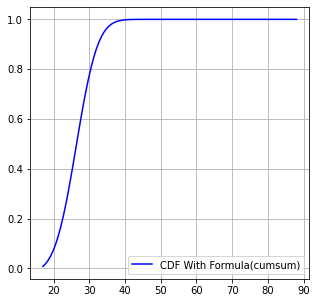

In [5]:
CDF_Fc = [None]*len(bins)
PDF_F = [None]*len(bins)
Sigma=np.sqrt(np.var(Age))
Miu=np.mean(Age)
plt.figure(figsize=(5,5))
#Here we create CDF_F using the PDF integral by using cumsum.
PDF_F=(1/(Sigma*np.sqrt(2*np.pi)))*np.exp(-1*((bins-Miu)**2)/(2*Sigma**2))
#for i in range(0,len(bins)):
 #   CDF_Fc[i]=sum(hist[0:i])/sum(hist)
CDF_Fc=np.cumsum(PDF_F)/PDF_F.sum()
ax = plt.subplot(111)
#Here we plot it accordingly.
ax.plot(bins,CDF_Fc,'b',label='CDF With Formula(cumsum)')
ax.grid(True)
ax.legend()
plt.show()

## Part c (with erf)

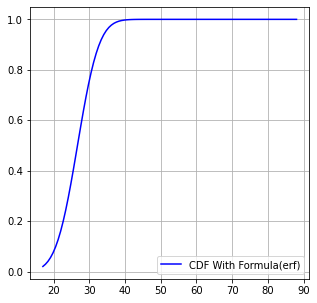

In [6]:
CDF_F = [None]*len(bins)
Sigma=np.sqrt(np.var(Age))
Miu=np.mean(Age)
plt.figure(figsize=(5,5))
#In this loop we create the CDF_F using erf.
for k in range(0,len(bins)):
    CDF_F[k] = (1+m.erf((bins[k]-Miu)/(np.sqrt(2)*Sigma)))/2
ax = plt.subplot(111)
#Here we plot it accordingly.
ax.plot(bins,CDF_F,'b',label='CDF With Formula(erf)')
ax.grid(True)
ax.legend()
plt.show()

## Part d

In [7]:
Prob20=np.interp(20,bins,CDF_Array)
Prob24=np.interp(24,bins,CDF_Array)
print(f'The probability is as follows : {Prob24-Prob20:.6f}')

The probability is as follows : 0.304708


## Q3

## Part a

In [8]:
random.seed(12345679)
Weight=Fifa_list[14]
Weight_Sample=random.sample(Weight,100)
Weight_Sample=np.array(Weight_Sample)
Miu1=np.mean(Weight_Sample)
Sigma1=np.sqrt(np.var(Weight_Sample))
print(f'The Mean Value is : {np.mean(Weight_Sample)}')
print(f'The Variance is : {np.var(Weight_Sample)}')
print(f'The Standard Deviation  is : {np.std(Weight_Sample)}')

The Mean Value is : 76.17
The Variance is : 57.961099999999995
The Standard Deviation  is : 7.61321876738085


## Part b

<class 'numpy.ndarray'>


<Figure size 360x360 with 0 Axes>

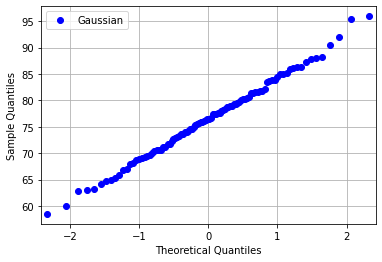

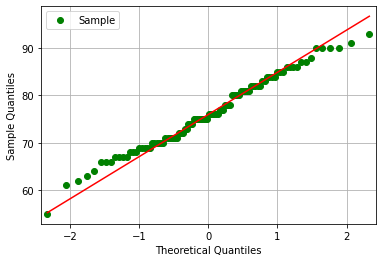

In [9]:
np.random.seed(12345679)
Gaussian1=np.random.normal(Miu1,Sigma1,100)
print(type(Gaussian1))
plt.figure(figsize=(5,5))
sm.qqplot(Gaussian1,label='Gaussian')
plt.grid(True)
plt.legend()
plt.show()
sm.qqplot(Weight_Sample,color='g',label='Sample',line='q')
plt.grid(True)
plt.legend()
plt.show()
#Here we plot it accordingly.


## Part C (n=500)

In [10]:
random.seed(12345679)
Weight=Fifa_list[14]
Weight_Sample=random.sample(Weight,500)
Weight_Sample=np.array(Weight_Sample)
Miu1=np.mean(Weight_Sample)
Sigma1=np.sqrt(np.var(Weight_Sample))
print(f'The Mean Value is : {np.mean(Weight_Sample)}')
print(f'The Variance is : {np.var(Weight_Sample)}')
print(f'The Standard Deviation  is : {np.std(Weight_Sample)}')

The Mean Value is : 75.462
The Variance is : 55.764556
The Standard Deviation  is : 7.467566939773623


<Figure size 360x360 with 0 Axes>

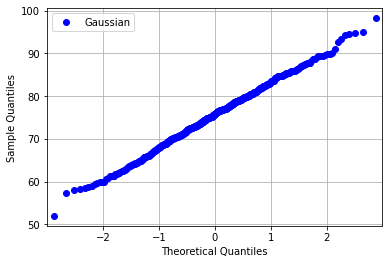

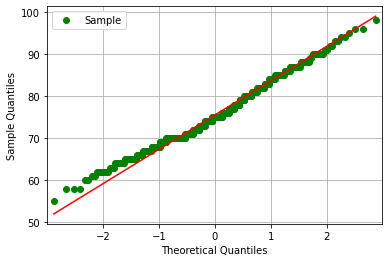

In [11]:
np.random.seed(12345679)
Gaussian1=np.random.normal(Miu1,Sigma1,500)
plt.figure(figsize=(5,5))
sm.qqplot(Gaussian1,label='Gaussian')
plt.grid(True)
plt.legend()
plt.show()
sm.qqplot(Weight_Sample,color='g',label='Sample',line='q')
plt.grid(True)
plt.legend()
plt.show()
#Here we plot it accordingly.


## Part c (n=2000)

In [12]:
random.seed(12345679)
Weight=Fifa_list[14]
Weight_Sample=random.sample(Weight,2000)
Weight_Sample=np.array(Weight_Sample)
Miu1=np.mean(Weight_Sample)
Sigma1=np.sqrt(np.var(Weight_Sample))
print(f'The Mean Value is : {np.mean(Weight_Sample)}')
print(f'The Variance is : {np.var(Weight_Sample)}')
print(f'The Standard Deviation  is : {np.std(Weight_Sample)}')

The Mean Value is : 75.3655
The Variance is : 49.48690975
The Standard Deviation  is : 7.034693294664665


<class 'numpy.ndarray'>


<Figure size 360x360 with 0 Axes>

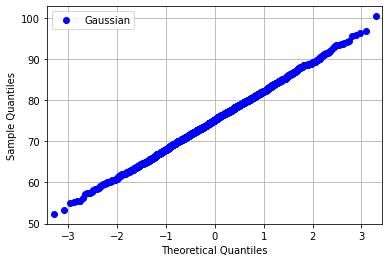

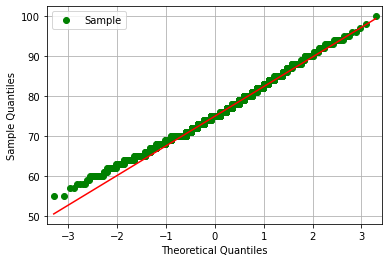

In [13]:
np.random.seed(12345679)
Gaussian3=np.random.normal(Miu1,Sigma1,2000)
print(type(Gaussian3))
plt.figure(figsize=(5,5))
sm.qqplot(Gaussian3,label='Gaussian')
plt.grid(True)
plt.legend()
sm.qqplot(Weight_Sample,color='g',label='Sample',line='q')
plt.grid(True)
plt.legend()
plt.show()
#Here we plot it accordingly.


As we can see by increasing the number of n the difference between the qqplot of our sample and the gaussian distribution created by the mean and variance of the said sample gets less and less,we can make this conclusin by the knowledge of the CLT theorem.

## Q4

## Part a

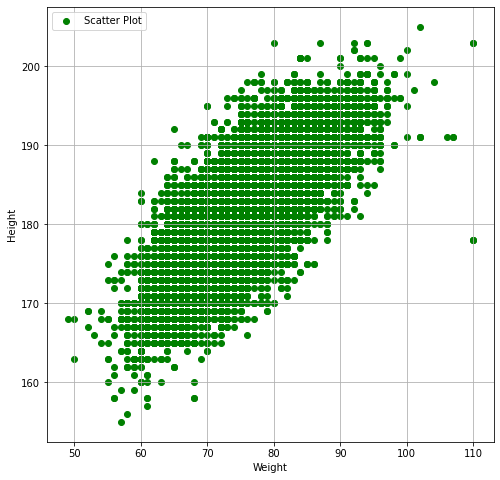

In [14]:
#Here we shall plot the scatter plot accordingly.
Height=Fifa_list[13]
plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.scatter(Weight,Height,color='g',label='Scatter Plot')
ax.set_xlabel("Weight")
ax.set_ylabel("Height")
ax.grid(True)
ax.legend()
plt.show()

By analyzing this scatter plot we can deduce and interpret that the weight and height of the footballers are codependant, it can be comprehended that taller players weigh more and vice versa.

## Part b

<Figure size 360x360 with 0 Axes>

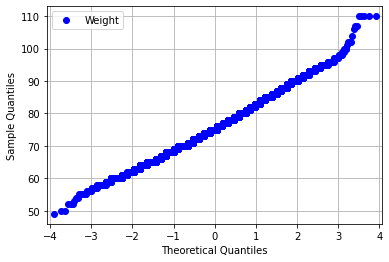

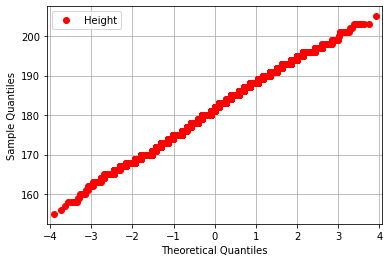

In [15]:
#Here we shall draw the qqplots of Weight and height accordingly
plt.figure(figsize=(5,5))
Weightplot=np.array(Weight)
sm.qqplot(Weightplot,label='Weight')
plt.grid(True)
plt.legend()
Heightplot=np.array(Height)
sm.qqplot(Heightplot,color='r',label='Height')
plt.grid(True)
plt.legend()
plt.show()

As we can see both of these random variables can roughly be considered as gaussian random variables.

## Q5

## Part a

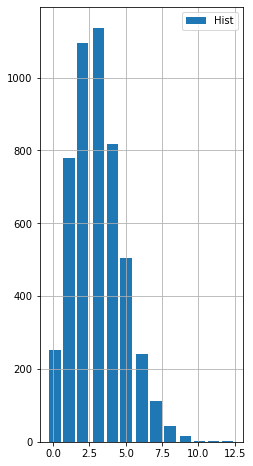

In [16]:
#Here I shall create the poisson distribution with lambda=3
np.random.seed(12345679)
PoissonDset=np.random.poisson(3,5000)
hist,bins=np.histogram(PoissonDset,100)
plt.figure(figsize=(8,8))
ax = plt.subplot(121)
ax.bar(bins[1:],hist,label='Hist')
ax.grid(True)
ax.legend()
plt.show()

<Figure size 360x360 with 0 Axes>

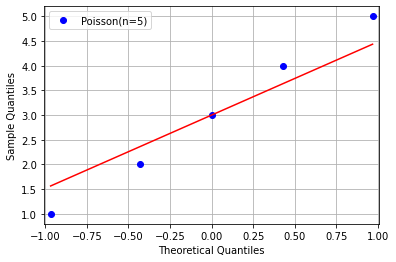

In [17]:
np.random.seed(12345679)
PoissonDset=np.random.poisson(3,5)
plt.figure(figsize=(5,5))
sm.qqplot(PoissonDset,label='Poisson(n=5)',line='q')
plt.grid(True)
plt.legend()
plt.show()

<Figure size 360x360 with 0 Axes>

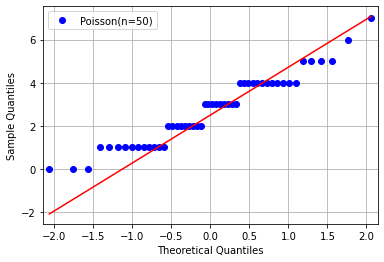

In [18]:
np.random.seed(12345679)
PoissonDset=np.random.poisson(3,50)
plt.figure(figsize=(5,5))
sm.qqplot(PoissonDset,label='Poisson(n=50)',line='q')
plt.grid(True)
plt.legend()
plt.show()

<Figure size 360x360 with 0 Axes>

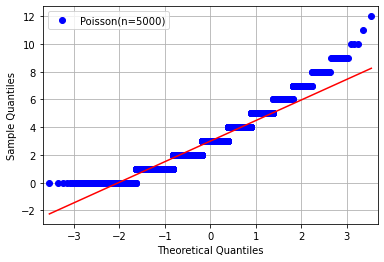

In [19]:
np.random.seed(12345679)
PoissonDset=np.random.poisson(3,5000)
plt.figure(figsize=(5,5))
sm.qqplot(PoissonDset,label='Poisson(n=5000)',line='q')
plt.grid(True)
plt.legend()
plt.show()

As we can see by increasing n the poisson distribution gets closer to the red line (normal distribution) this is acceptable due to the CLT theorem,because in the said theorem by increasing n the distribution gets closer to the normal distribution.

## Q6

In this part essentially,pace is y and weight is x.

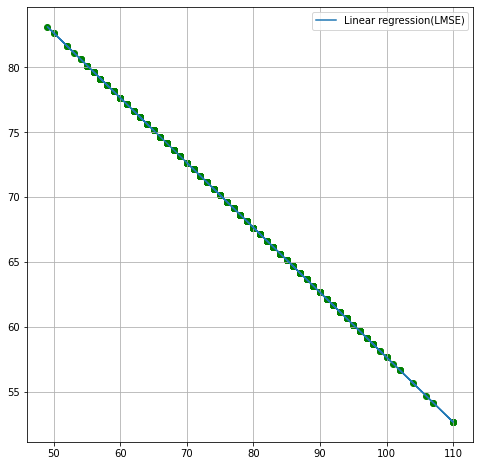

In [20]:
x=np.array(Weight)
y=np.array(Pace)
Miuy=np.mean(y)
Miux=np.mean(x)
Sigmax=np.std(x)
Sigmay=np.std(y)
rxy=np.corrcoef(x,y)[0,1]
a=(rxy*Sigmay)/(Sigmax)
b=Miuy-a*Miux
f=a*x+b
plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.scatter(x,f,color='g')
ax.plot(x,f,label='Linear regression(LMSE)')
ax.grid(True)
ax.legend()
plt.show()

By computing and plotting the linear regression we can deduce that Correlation Coefficient is negative,hence we can interpret that when a player is heavier,the pace shall be less.

## Bonus

## Q1

[0.0, 0.1, 0.0, 0.1111111111111111, 0.0, 0.125, 0.25, 0.14285714285714285, 0.0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.6, 0.5, 0.3333333333333333, 0.6666666666666666, 0.5, 0.0, 1.0, 0]


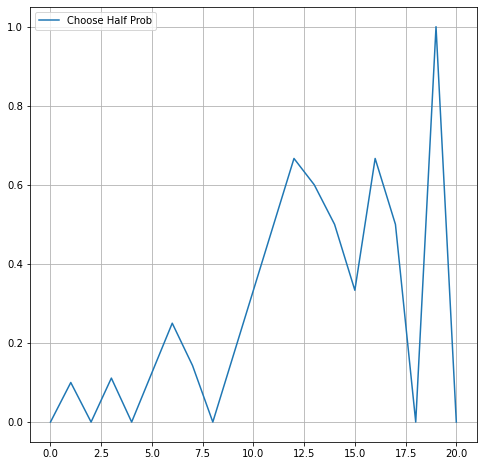

In [21]:
N_pill=10
whole=10
half=0
Pill_Arr=[whole,half]
Prob_Arr=[]
np.random.seed(12345679)
while(N_pill!=0):
    if((half+whole)==0):
        Prob_Arr.append(0)
        break
    prob=half/(half+whole)
    Prob_Arr.append(prob)
    R_N=np.random.rand()
    if(0<R_N<(whole/(half+whole))):
        whole-=1
        half+=1
    elif(half>=1):
        half-=1
print(Prob_Arr)
X=np.arange(0,len(Prob_Arr))
plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.plot(X,Prob_Arr,label='Choose Half Prob')
ax.grid(True)
ax.legend()

## Q2

## Part a

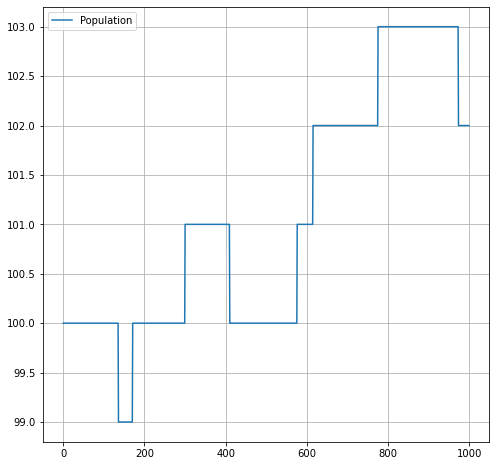

In [22]:
Init_Pop=100
Pop_Arr=[]
np.random.seed(12345679)
for i in range(0,1000):
    Pop_Arr.append(Init_Pop)
    if(Init_Pop==0):
        break
    R_N1=np.random.rand()
    if(0<R_N1<(0.5/(Init_Pop))):
        Init_Pop-=1
    R_N2=np.random.rand()
    if(0<R_N2<(0.5/(Init_Pop))):
        Init_Pop+=1
X=np.arange(0,len(Pop_Arr))
plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.plot(X,Pop_Arr,label='Population')
ax.grid(True)
ax.legend()

## Part b

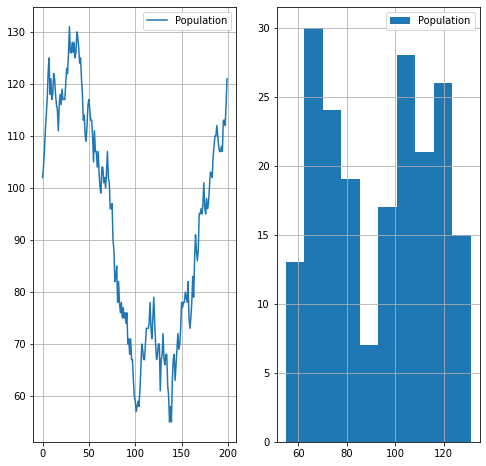

In [23]:
Init_Pop=100
np.random.seed(12345679)
Pop_Arr=[]
Tot_Pop_Arr=[]
i=0
j=0
while(j<=199):
    Pop_Arr=[]
    for i in range(0,1000):
        Pop_Arr.append(Init_Pop)
        if(Init_Pop==0):
            break
        R_N1=np.random.rand()
        if(0<R_N1<(0.5/(Init_Pop))):
            Init_Pop-=1
        R_N2=np.random.rand()
        if(0<R_N2<(0.5/(Init_Pop))):
            Init_Pop+=1
        if(i==999):
            Tot_Pop_Arr.append(Init_Pop)
    j+=1
X=np.arange(0,len(Tot_Pop_Arr))
plt.figure(figsize=(8,8))
ax = plt.subplot(121)
ax.plot(X,Tot_Pop_Arr,label='Population')
ax.grid(True)
ax.legend()
ax = plt.subplot(122)
ax.hist(Tot_Pop_Arr,label='Population')
ax.grid(True)
ax.legend()

## Part C

### N=10

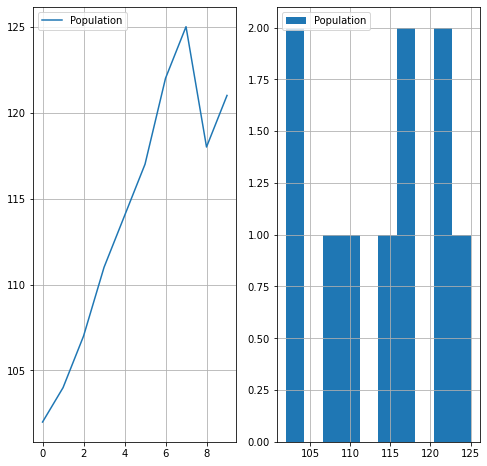

In [24]:
Init_Pop=100
np.random.seed(12345679)
Pop_Arr=[]
Tot_Pop_Arr=[]
j=0
while(j<=9):
    Pop_Arr=[]
    for i in range(0,1000):
        Pop_Arr.append(Init_Pop)
        if(Init_Pop==0):
            break
        R_N1=np.random.rand()
        if(0<R_N1<(0.5/(Init_Pop))):
            Init_Pop-=1
        R_N2=np.random.rand()
        if(0<R_N2<(0.5/(Init_Pop))):
            Init_Pop+=1
        if(i==999):
            Tot_Pop_Arr.append(Init_Pop)
    j+=1
X=np.arange(0,len(Tot_Pop_Arr))
plt.figure(figsize=(8,8))
ax = plt.subplot(121)
ax.plot(X,Tot_Pop_Arr,label='Population')
ax.grid(True)
ax.legend()
ax = plt.subplot(122)
ax.hist(Tot_Pop_Arr,label='Population')
ax.grid(True)
ax.legend()

### N=100

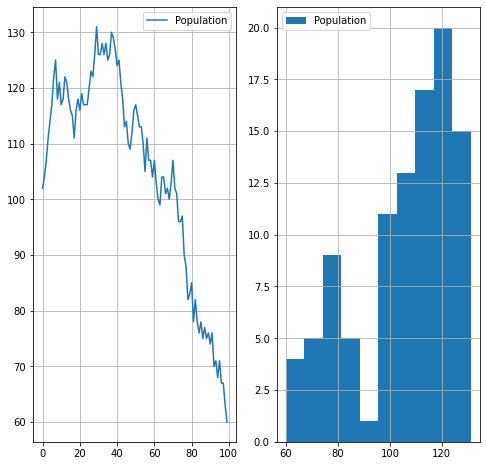

In [25]:
Init_Pop=100
np.random.seed(12345679)
Pop_Arr=[]
Tot_Pop_Arr=[]
j=0
while(j<=99):
    Pop_Arr=[]
    for i in range(0,1000):
        Pop_Arr.append(Init_Pop)
        if(Init_Pop==0):
            break
        R_N1=np.random.rand()
        if(0<R_N1<(0.5/(Init_Pop))):
            Init_Pop-=1
        R_N2=np.random.rand()
        if(0<R_N2<(0.5/(Init_Pop))):
            Init_Pop+=1
        if(i==999):
            Tot_Pop_Arr.append(Init_Pop)
    j+=1
X=np.arange(0,len(Tot_Pop_Arr))
plt.figure(figsize=(8,8))
ax = plt.subplot(121)
ax.plot(X,Tot_Pop_Arr,label='Population')
ax.grid(True)
ax.legend()
ax = plt.subplot(122)
ax.hist(Tot_Pop_Arr,label='Population')
ax.grid(True)
ax.legend()

### N=1000

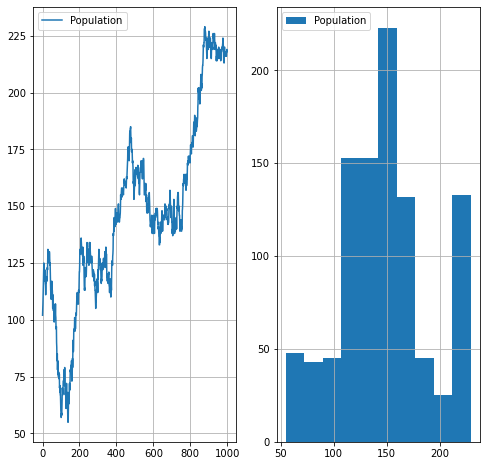

In [26]:
Init_Pop=100
np.random.seed(12345679)
Pop_Arr=[]
Tot_Pop_Arr=[]
j=0
while(j<=999):
    Pop_Arr=[]
    for i in range(0,1000):
        Pop_Arr.append(Init_Pop)
        if(Init_Pop==0):
            break
        R_N1=np.random.rand()
        if(0<R_N1<(0.5/(Init_Pop))):
            Init_Pop-=1
        R_N2=np.random.rand()
        if(0<R_N2<(0.5/(Init_Pop))):
            Init_Pop+=1
        if(i==999):
            Tot_Pop_Arr.append(Init_Pop)
    j+=1
X=np.arange(0,len(Tot_Pop_Arr))
plt.figure(figsize=(8,8))
ax = plt.subplot(121)
ax.plot(X,Tot_Pop_Arr,label='Population')
ax.grid(True)
ax.legend()
ax = plt.subplot(122)
ax.hist(Tot_Pop_Arr,label='Population')
ax.grid(True)
ax.legend()

We can deduce that with increasing n, we get closer to the Normal(Gaussian) distribution.